**Boston House Prices Project - Evaluating the Performance of Four Types of Machine Learning Regressors**

Objective: to compare the performance of four different ML regressors (Linear regression, Decision tree, Random forest and SVM) for predicting the median house price in various Boston suburbs, and to develop the most promising model for accurately performing said predictions

**Outline:**

- dataset: https://www.kaggle.com/datasets/sakshisatre/the-boston-housing-dataset
  - do data cleaning: impute na's, feature engineering, one-hot encoding
- perform regression using different models and hyperparameters
  - choose model types: linear regression, SVM, decision tree, random forest
  - compare their performance using cross-validation and judging by the performance metric root mean square error
- selecting the most promising model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sakshisatre/the-boston-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sakshisatre/the-boston-housing-dataset/versions/5


In [ ]:
import os
df1 = pd.read_csv(os.path.join(path, "Boston (1).csv"))

The dataset has 14 features and 506 observations. The feature are the following:
1. CRIM: per capita crime rate by town (numeric)
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. (numeric)
3. INDUS: proportion of non-retail business acres per town (numeric)
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) (categorical)
5. NOX: nitric oxides concentration (parts per 10 million) (numeric)
6. RM: average number of rooms per dwelling (numeric)
7. AGE: proportion of owner-occupied units built prior to 1940 (numeric)
8. DIS: weighted distances to five Boston employment centres (numeric)
9. RAD: index of accessibility to radial highways (numeric)
10. TAX: full-value property-tax rate per $10,000 (numeric)

11. PTRATIO: pupil-teacher ratio by town (numeric)
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of [people of African American descent] by town (numeric)
13. LSTAT: % lower status of the population (numeric)
*14. MEDV: Median value of owner-occupied homes in $1000s (target variable) (numeric)*



In [ ]:
print(f"The dataframe dimensions are {df1.shape}")
print(f"Are there duplicates? {df1.duplicated().sum()}")
print(f"Are there NA's? \n{df1.isnull().sum()}")

The dataframe dimensions are (506, 14)
Are there duplicates? 0
Are there NA's? 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


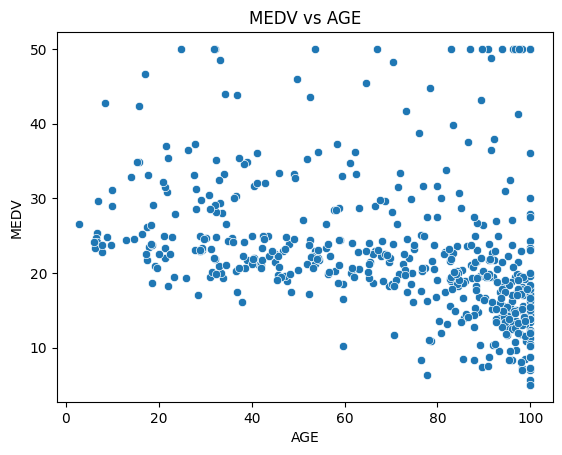

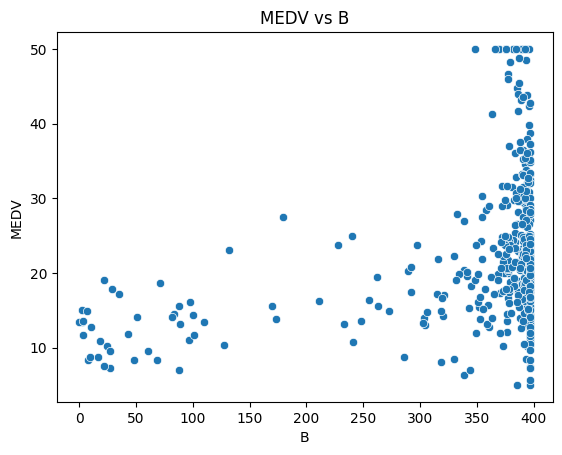

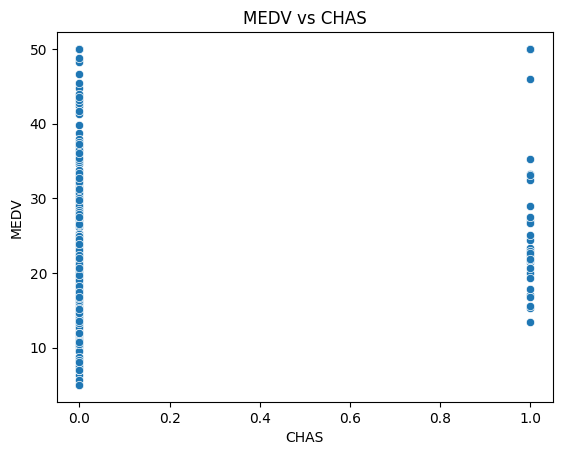

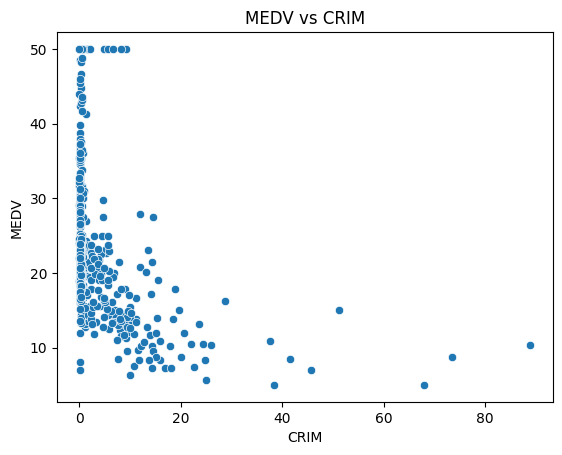

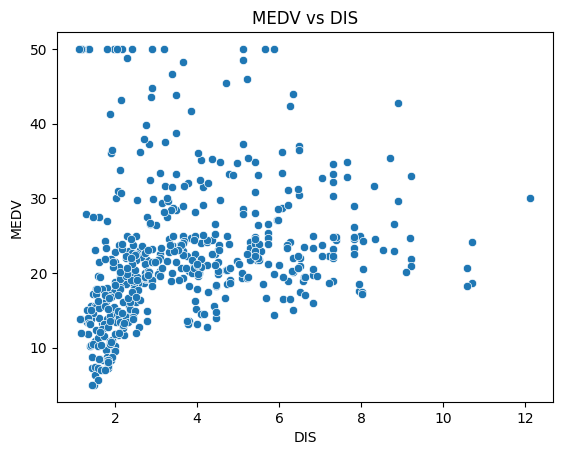

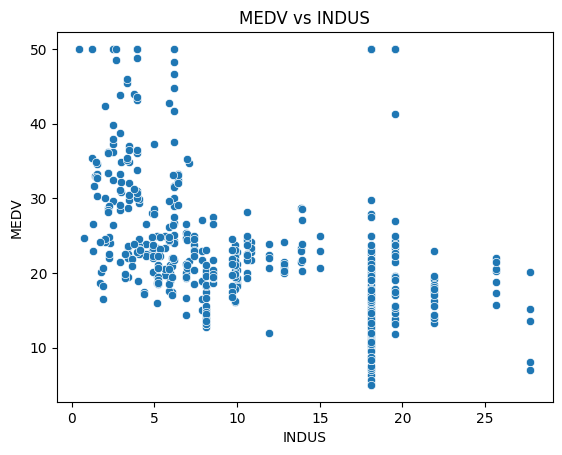

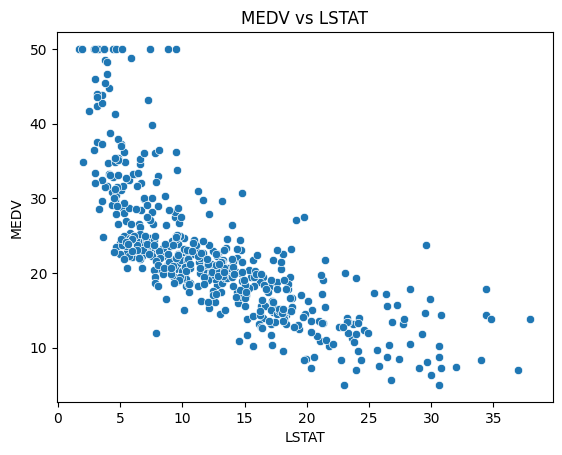

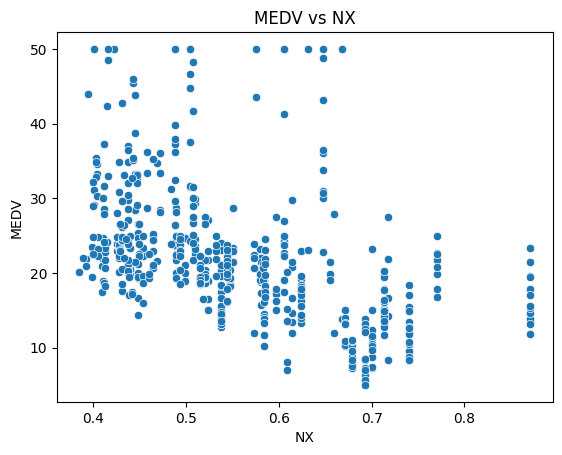

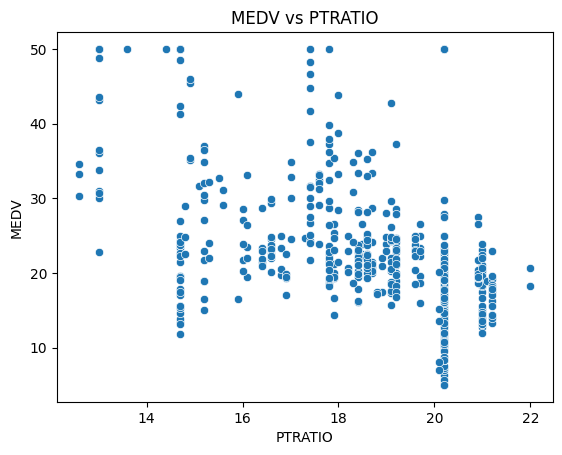

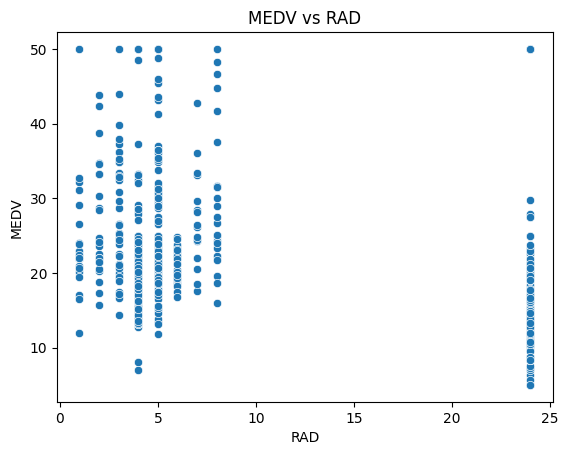

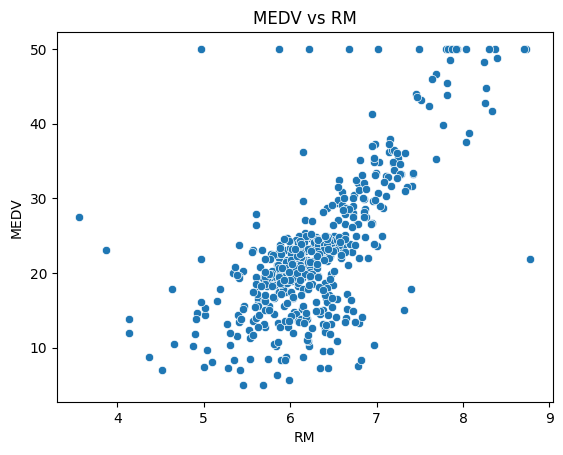

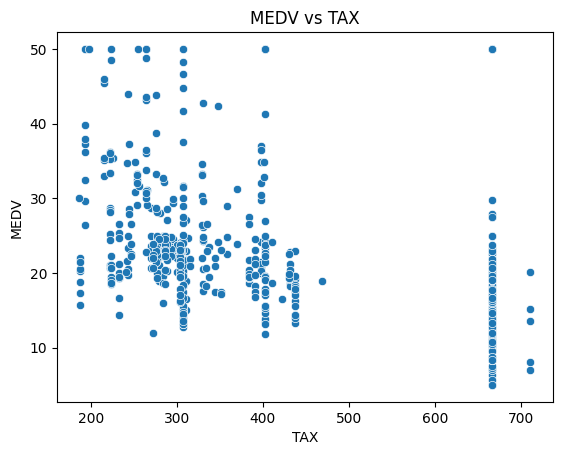

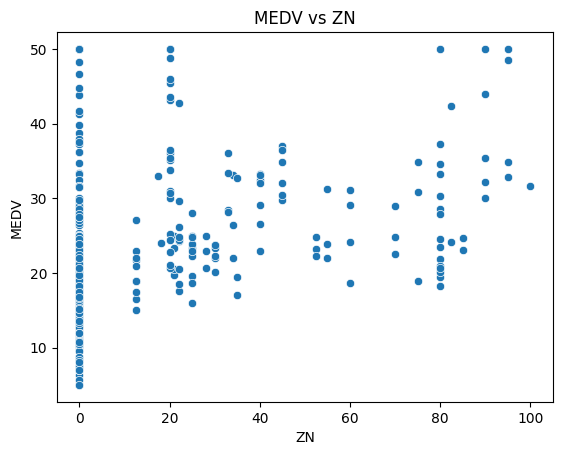

In [ ]:
#plotting each feature vs. median housing price
for col in df1.columns.difference(['MEDV']):
    plt.figure()
    sns.scatterplot(data=df1, x= col, y='MEDV')
    plt.title(f'MEDV vs {col}')

In [ ]:
df1 = df1.drop(["B", "CHAS", "ZN", "NX"], axis = 1)

*Data cleaning complete.*
- no duplicate rows
- no NA's
- some of the features that are less correlated with the median housing prices were dropped
- 506 rows (observations), and 10 columns (features)-- 9 input and 1 output (the last one).


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop(["MEDV"], axis=1)
y = df1.MEDV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

**Comparing different models:**
Linear regression, Decision tree, Random forests, SVM

<Axes: xlabel='Regressor', ylabel='RMSE'>

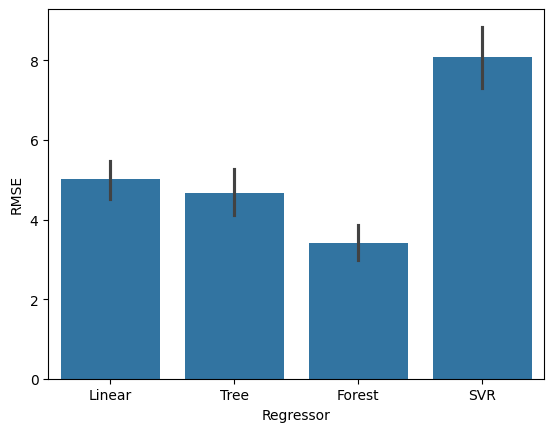

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


k_fold = 10
regressor_list = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, SVR]
regressor_name_list = ["Linear", "Tree", "Forest", "SVR"]
score_dict = {"Regressor": [], "RMSE": []}
for Regressor,name in zip(regressor_list, regressor_name_list):
  reg = Regressor()
  neg_MSE = cross_val_score(reg, X_train, y_train, scoring="neg_mean_squared_error", cv=k_fold)
  RSME = np.sqrt(-neg_MSE)
  score_dict["Regressor"].extend([name]*k_fold)
  score_dict["RMSE"].extend(RSME)

score_df = pd.DataFrame(score_dict)
sns.barplot(score_dict, x="Regressor", y="RMSE")

The Random Forest Regressor showed the best performance and showed it consistently. It has the lowest mean RMSE and the lowest standard deviation.

*Hence, we choose the random forest regressor as our ML model.*


**Training the Random Forest Regressor on the full set of training data**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

predictions_train = forest_reg.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)
print(f"The error on the training dataset is {rmse_train}")

predictions_test = forest_reg.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)
print(f"The error on the test dataset is {rmse_test}")

The error on the training dataset is 1.2453418006696184
The error on the test dataset is 3.534941062270415


**Conclusion**

The model was able to predict the housing prices fairly well. It has an average error of around \$3.55K, which is about 7.8% of the prices range (\$5K to \$50K).


There is always room for improvement. The fact that the training error is lower than the test error means that the model is still overfitting the training data. Potential ways to fix this are to gather more data, or to regularize the model.


This model and project can be extended to the housing prices of suburbs in other areas or can be extended to the housing prices of Boston suburbs over time. In the second case, we can possibly use the model to predict how housing prices in Boston suburbs might change over time.